# Leaf Disease Classification

## INTRODUCTION

Cassava, a vital staple crop for millions worldwide, is highly susceptible to leaf diseases that can severely impact yield and threaten global food security. This project presents a deep learning-based image classification system designed to automatically detect and categorize cassava leaf conditions. The model classifies leaf images into five categories—four prevalent cassava diseases and healthy leaves—facilitating early diagnosis and supporting timely interventions to protect crop health and food supply chains.


## AIM

The goal of this project is to develop a highly accurate Convolutional Neural Network (CNN) capable of distinguishing between various cassava leaf conditions. The system is designed to be trained and rigorously evaluated on a labeled dataset, ensuring reliable detection of cassava diseases. By incorporating advanced machine learning techniques and performance optimization strategies, the model aims to deliver robust classification results, supporting early intervention and enhancing agricultural disease management.




### Import Statements

In [1]:
%pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0 --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install --upgrade tensorflow

  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 4.2/376.0 MB 22.9 MB/s eta 0:00:17
    --------------------------------------- 8.7/376.0 MB 21.5 MB/s eta 0:00:18
   - -------------------------------------- 11.3/376.0 MB 18.5 MB/s eta 0:00:20
   - -------------------------------------- 14.4/376.0 MB 17.8 MB/s eta 0:00:21
   - -------------------------------------- 18.6/376.0 MB 18.1 MB/s eta 0:00:20
   -- ------------------------------------- 22.3/376.0 MB 18.1 MB/s eta 0:00:20
   -- ------------------------------------- 26.0/376.0 MB 18.1 MB/s eta 0:00:20
   --- ------------------------------------ 28.8/376.0 MB 17.7 MB/s eta 0:00:20
   --- ------------------------------------ 30.9/376.0 MB 16.8 MB/s eta 0:00:21
   --- ------------------------------------ 34.3/376.0 MB 16.6 MB/s eta 0:00:2


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install --upgrade matplotlib pandas seaborn Pillow keras


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a6/b6/a9405484fb40746fdc6ae4502b16a9d6e53282ba5baaf9ebe2da579f68c4/matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/7c/18/24bff2ad716257fc03da964c5e8f05d9790a779a8895d6566e493ccf0189/pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/cont


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import random
import warnings

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import re
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Reshape, GlobalAveragePooling2D,Activation
from tensorflow.keras.regularizers import l2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


warnings.filterwarnings("ignore")

C:\Users\Aman\AppData\Local\Temp\ipykernel_30992\321598198.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading Data

In [20]:
df=pd.read_csv(f'C:/Users/Aman/Downloads/cassava-leaf-disease-classification/train.csv')
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [21]:
img_path=f'C:/Users/Aman/Downloads/cassava-leaf-disease-classification/train_images/'
df['image_id'] = df['image_id'].apply(lambda x: img_path + x)

In [22]:
df.rename(columns={'image_id': 'img'}, inplace=True)

In [23]:
df.img[0]

'C:/Users/Aman/Downloads/cassava-leaf-disease-classification/train_images/1000015157.jpg'

In [24]:
df.label.value_counts()

label
3    13158
4     2577
2     2386
1     2189
0     1087
Name: count, dtype: int64

### Exploratory Data Analysis

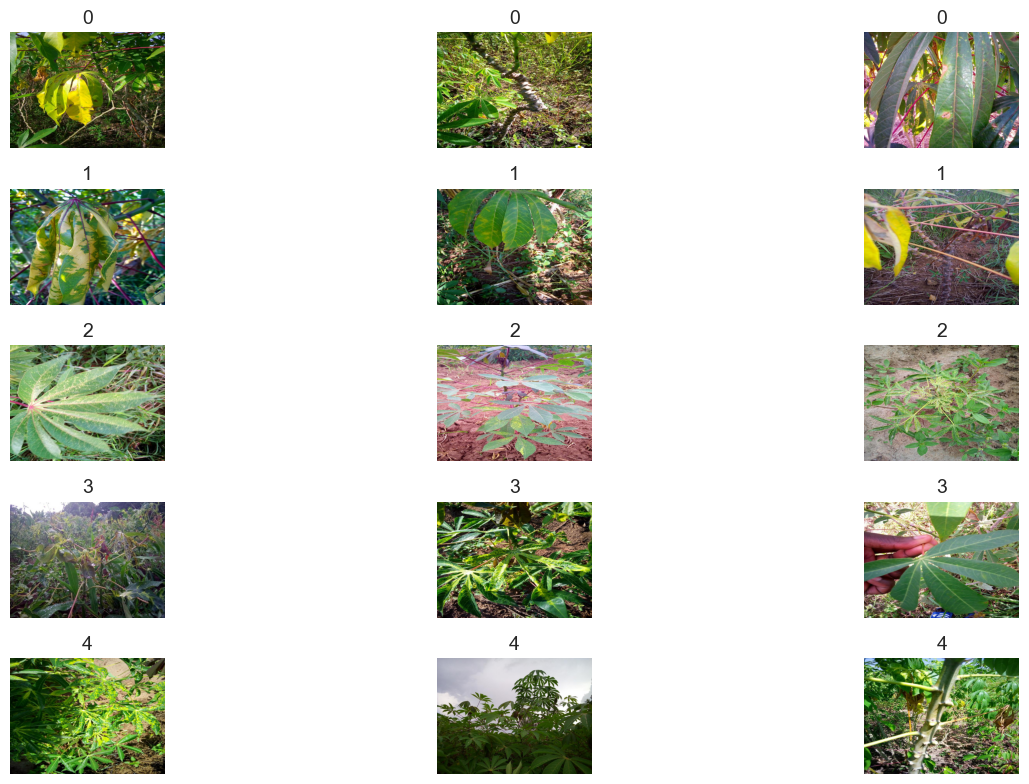

In [25]:
selected_images = df.groupby('label', as_index=False).apply(lambda x: x.sample(n=3, random_state=1)).reset_index(drop=True)

sns.set(style='whitegrid')
fig, axes = plt.subplots(5, 3, figsize=(15, 8))

axes = axes.flatten()

for ax, (img_path, label) in zip(axes, zip(selected_images['img'], selected_images['label'])):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label, fontsize=14)

plt.tight_layout()
plt.show()

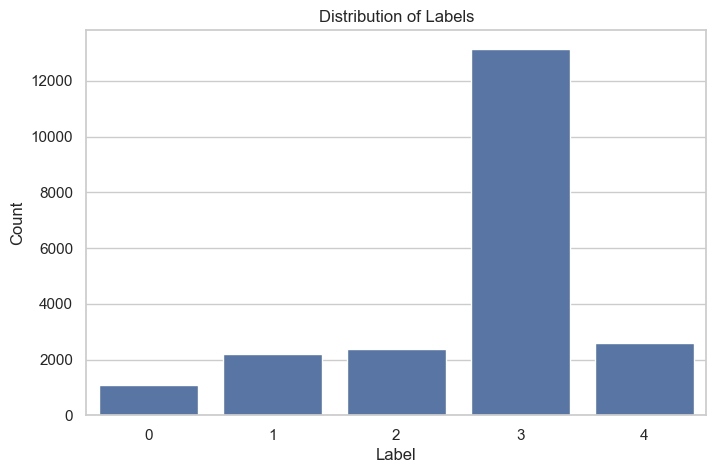

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)

# Add titles and labels
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

# Display the plot
plt.show()

### Preparing Test Data

In [27]:
img_width, img_height = 64, 64

In [ ]:
#Resizing and Normalizing the images

x = []
y = []

for img_path, label in zip(df['img'], df['label']):
    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (img_width, img_height))
    #Normalizes the image pixel values
    img = img / 255.0
    x.append(img)
    y.append(label)

In [29]:
x = np.array(x)
y=df[["label"]]

### Data Augmentation


In [30]:
x_reshaped = x.reshape(x.shape[0], -1)
y_reshaped = y['label'].values

smote = SMOTE(random_state=42)

x_resampled, y_resampled = smote.fit_resample(x_reshaped, y_reshaped)
x_resampled_images = x_resampled.reshape(-1, img_width, img_height, 3)

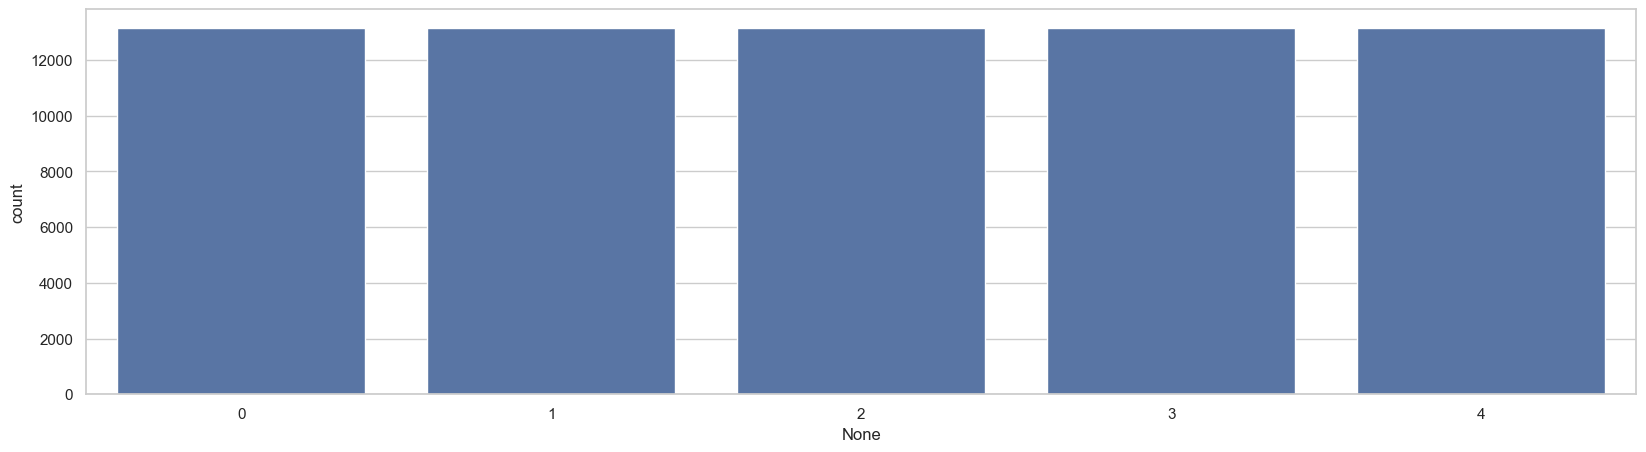

In [31]:
plt.figure(figsize=(20,5))
y_resampled_series = pd.Series(y_resampled)
ax=sns.countplot(x=y_resampled_series)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled_images,y_resampled,test_size=.2,random_state=42)

## CNN

In [33]:
model = Sequential()
model.add(Input(shape=(img_width, img_height, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(df.label.unique()),activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 98s 56ms/step - accuracy: 0.4326 - loss: 1.3193 - val_accuracy: 0.5598 - val_loss: 1.0854
Epoch 2/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.5965 - loss: 1.0194 - val_accuracy: 0.6756 - val_loss: 0.8359
Epoch 3/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 70s 42ms/step - accuracy: 0.6995 - loss: 0.7754 - val_accuracy: 0.7280 - val_loss: 0.7185
Epoch 4/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.7745 - loss: 0.5941 - val_accuracy: 0.7879 - val_loss: 0.5810
Epoch 5/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 94s 57ms/step - accuracy: 0.8294 - loss: 0.4516 - val_accuracy: 0.8063 - val_loss: 0.5329
Epoch 6/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.8746 - loss: 0.3399 - val_accuracy: 0.8451 - val_loss: 0.4545
Epoch 7/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9022 - loss: 0.2671 - val_accuracy: 0.8519 - val_loss: 0.4303
Epoch 8/30
1645/1645 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.9204 -

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,560,785 (5.95 MB)

 Trainable params: 520,261 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,040,524 (3.97 MB)

In [36]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.488410,1.221893,0.559812,1.085359
1,0.622112,0.960003,0.675559,0.835889
2,0.714109,0.743234,0.727998,0.718481
3,0.782604,0.574257,0.787886,0.580997
4,0.832687,0.446256,0.806278,0.532918
5,0.870725,0.348960,0.845113,0.454535
6,0.898313,0.276385,0.851877,0.430347
7,0.915888,0.232627,0.860465,0.429897
8,0.929036,0.195534,0.873689,0.438559
9,0.938042,0.171411,0.869585,0.445193


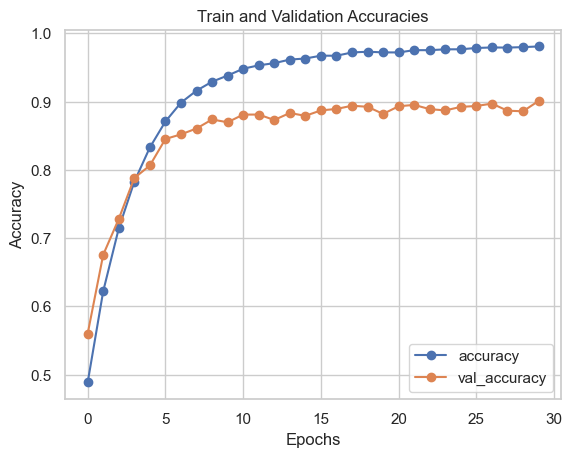

In [37]:
ax = history_df[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies" , marker='o')
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

In [38]:
model.save('leaf_disease.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


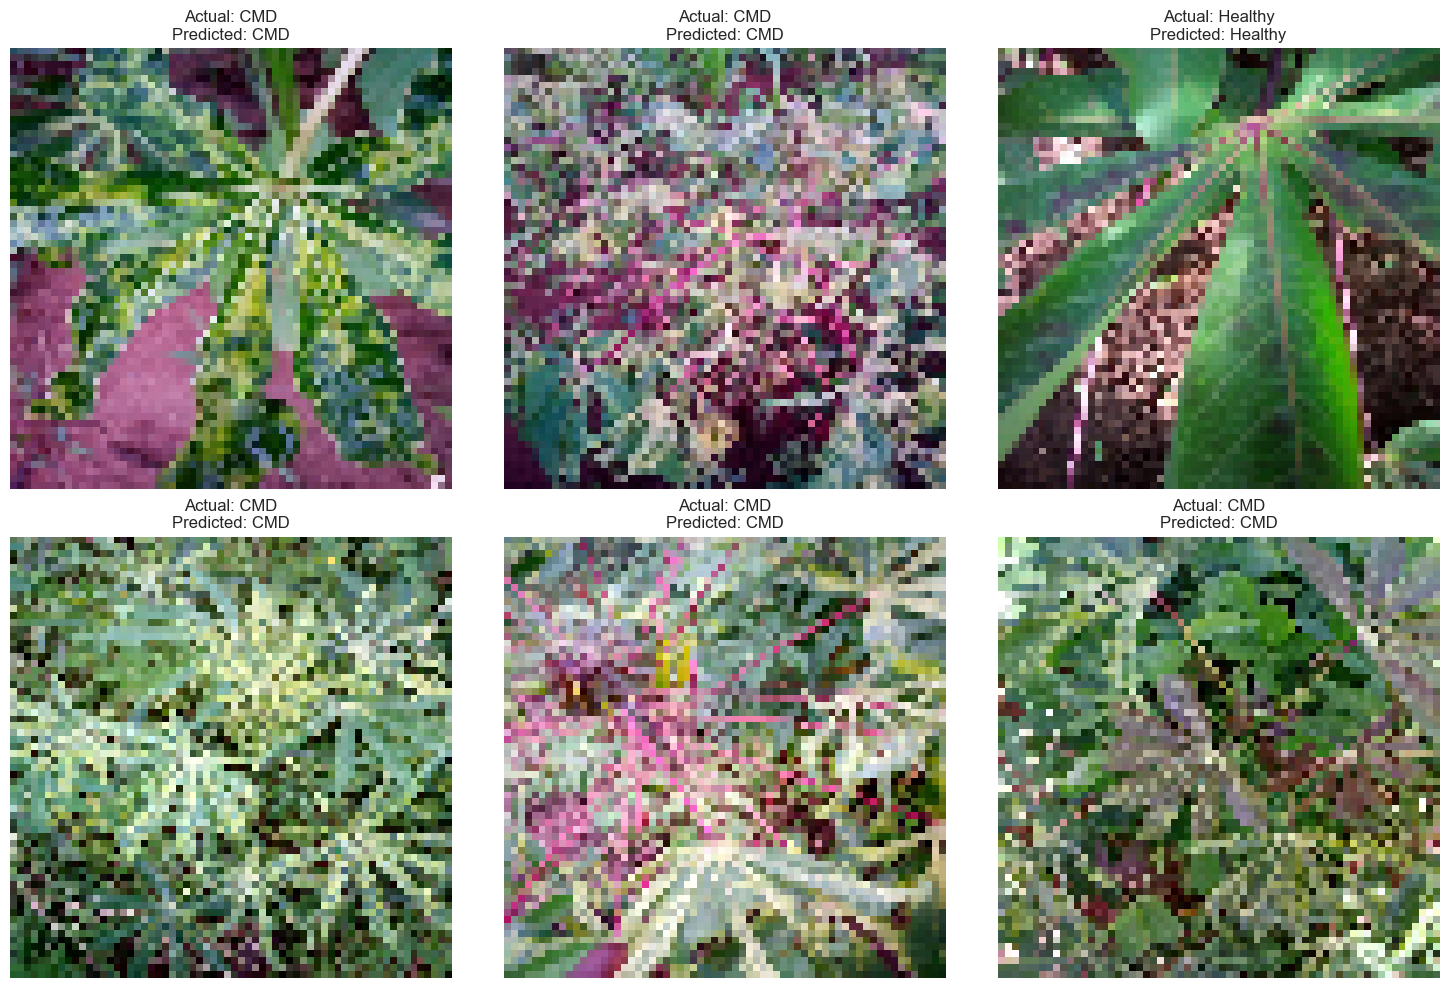

In [60]:
img_size = (img_width, img_height)
test_images = df.sample(n=6)

images = []
predicted_classes = []
actual_classes = []

for index, row in test_images.iterrows():
    img_path = row['img']
    actual_class = row['label']
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    images.append(img)
    predicted_classes.append(predicted_class[0])
    actual_classes.append(actual_class)

class_labels = {
    0: "CBB",
    1: "CBSD",
    2: "CGM",
    3: "CMD",
    4: "Healthy"
}


num_images = len(images)
cols = 3
rows = (num_images // cols) + (num_images % cols > 0)

plt.figure(figsize=(15, rows * 5))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.title(f'Actual: {class_labels[actual_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# MODEL TESTING

## READING TEST DATA

In [45]:
img_path = f"C:/Users/Aman/Downloads/cassava-leaf-disease-classification/test_images/"
img_list=[]
img_id=[]
for img in os.listdir(img_path):
    img_list.append(img_path+"/"+img)
    img_id.append(img)

## PREDICT IMAGES

In [46]:
df_test=pd.DataFrame({
    'img_id':img_id,
    'img_file':img_list
})

In [47]:
x_test=[]
for img in df_test['img_file']:
    img=cv2.imread(img)
    img=cv2.resize(img,(img_width,img_height))
    img=img/255.0
    x_test.append(img)
x_test=np.array(x_test)
x_test = x_test.reshape((-1, img_width, img_height, 3))

In [48]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [49]:
df_test['label']=predictions

In [56]:
df_test.to_csv('prediction.csv',index=False)